# Dependancies:

In [639]:
# # Installing the Levenshtein Library:
# pip install python-Levenshtein

In [640]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MultiLabelBinarizer
from Levenshtein import distance
import regex as re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Parsing the Data

In [641]:
# users = pd.read_csv(
#     r'C:\Users\squink\Desktop\Movie Recommendation System Project\data\ml-1m\users.dat',
#     sep='::',  # Specifying the delimiter
#     engine='python',
#     names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'] # Defining column names
# )
# print(users.head())

In [642]:
# ratings = pd.read_csv(
#     r'C:\Users\squink\Desktop\Movie Recommendation System Project\data\ml-1m\ratings.dat',
#     sep='::',
#     engine='python',
#     names=['UserID', 'MovieID', 'Rating', 'Timestamp']
# )
# print(ratings.head())


In [643]:
# movies = pd.read_csv(
#     r'C:\Users\squink\Desktop\Movie Recommendation System Project\data\ml-1m\movies.dat',
#     sep='::',
#     engine='python',
#     names=['MovieID', 'Title', 'Genre'],
#     encoding= 'latin-1'
# )
# print(movies.head())

# Saving to CSV files:

In [644]:
# ratings.to_csv('ratings.csv', index= False);
# movies.to_csv('movies.csv', index= False);
# users.to_csv('users.csv', index= False);

# Converting Into Dataframes:

In [645]:
ratings_df = pd.read_csv(r'C:\Users\squink\Desktop\Movie-Recommendation-System-Project\csv_files\ratings.csv')
movies_df = pd.read_csv(r'C:\Users\squink\Desktop\Movie-Recommendation-System-Project\csv_files\movies.csv')
users_df = pd.read_csv(r'C:\Users\squink\Desktop\Movie-Recommendation-System-Project\csv_files\users.csv')

# Creating the copies we will be working with:
ratings = ratings_df.copy()
movies = movies_df.copy()
users = users_df.copy()

# Data Exploration:

In [646]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [647]:
ratings['Timestamp'].dtype

dtype('int64')

In [648]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [649]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genre    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


# Data Pre-Processing (ratings):

In [650]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


It is good practice, when writing code such as the one below to wrap your transformation in an if statement so that your code doesn't error when you rerun it.

In [651]:
# Converting 'Timestamp' to datetime object if not already converted:
if ratings['Timestamp'].dtype != 'datetime64[ns]':
    ratings['Timestamp'] = pd.to_datetime(ratings['Timestamp'], unit= 's', errors= 'coerce')
ratings['Timestamp']

0         2000-12-31 22:12:40
1         2000-12-31 22:35:09
2         2000-12-31 22:32:48
3         2000-12-31 22:04:35
4         2001-01-06 23:38:11
                  ...        
1000204   2000-04-26 02:35:41
1000205   2000-04-25 23:21:27
1000206   2000-04-25 23:19:06
1000207   2000-04-26 02:20:48
1000208   2000-04-26 02:19:29
Name: Timestamp, Length: 1000209, dtype: datetime64[ns]

In [652]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   UserID     1000209 non-null  int64         
 1   MovieID    1000209 non-null  int64         
 2   Rating     1000209 non-null  int64         
 3   Timestamp  1000209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 30.5 MB


Most ML algorithms will not be able to automatically process datetime objects therefore we must split it into its components s.t. each one is strictly numeric.

In [653]:
# Extracting the components from our datetime object:
ratings['Year'] = ratings['Timestamp'].dt.year
ratings['Month'] = ratings['Timestamp'].dt.month
ratings['Day'] = ratings['Timestamp'].dt.day
ratings['Hour'] = ratings['Timestamp'].dt.hour
ratings['Minute'] = ratings['Timestamp'].dt.minute
ratings['Second'] = ratings['Timestamp'].dt.second

# Dropping the datetime object column (no longer needed):
ratings = ratings.drop('Timestamp', axis = 1)

In [654]:
ratings.head()

,UserID,MovieID,Rating,Year,Month,Day,Hour,Minute,Second
0,1,1193,5,2000,12,31,22,12,40
1,1,661,3,2000,12,31,22,35,9
2,1,914,3,2000,12,31,22,32,48
3,1,3408,4,2000,12,31,22,4,35
4,1,2355,5,2001,1,6,23,38,11


Next we will check the df for duplicates as this dataset states that there are duplicates in the data (specifically the movie set but it doesn't hurt to be safe). We will define a function to do this so we don't have to write the same code 3 seperate times - this makes our code cleaner and less repetitive.

In [655]:
def check_duplicates(df):
    ''' 
    Prints the duplicate count for the df being passed in
    '''
    duplicate_count = df.duplicated().sum()
    return duplicate_count
check_duplicates(ratings)

0

All non-null counts seem to match in the info output above but let's explicitly check for null values to make sure. Again, we'll define a function to make our lives easier in the future.

In [656]:
def check_nulls(df):
    ''' 
    Checks the df passed in for nulls
    '''
    null_count = df.isna().sum()
    return null_count
check_nulls(ratings)

UserID     0
MovieID    0
Rating     0
Year       0
Month      0
Day        0
Hour       0
Minute     0
Second     0
dtype: int64

Let's double check that all data types are resolved. Yup, looks good! 

In [657]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 9 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   UserID   1000209 non-null  int64
 1   MovieID  1000209 non-null  int64
 2   Rating   1000209 non-null  int64
 3   Year     1000209 non-null  int32
 4   Month    1000209 non-null  int32
 5   Day      1000209 non-null  int32
 6   Hour     1000209 non-null  int32
 7   Minute   1000209 non-null  int32
 8   Second   1000209 non-null  int32
dtypes: int32(6), int64(3)
memory usage: 45.8 MB


In [658]:
ratings.head()

,UserID,MovieID,Rating,Year,Month,Day,Hour,Minute,Second
0,1,1193,5,2000,12,31,22,12,40
1,1,661,3,2000,12,31,22,35,9
2,1,914,3,2000,12,31,22,32,48
3,1,3408,4,2000,12,31,22,4,35
4,1,2355,5,2001,1,6,23,38,11


# Data Pre-Processing (users):

In [659]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [660]:
check_nulls(users)

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [661]:
check_duplicates(users)

0

In [662]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [663]:
# Binarizing the gender column:
if 'Gender' in users.columns:
    users= (pd.get_dummies(users, columns=['Gender']))*1
    users

In [664]:
users.head()

,UserID,Age,Occupation,Zip-code,Gender_F,Gender_M
0,1,1,10,48067,1,0
1,2,56,16,70072,0,1
2,3,25,15,55117,0,1
3,4,45,7,02460,0,1
4,5,25,20,55455,0,1


In [665]:
# Cleaning the 'Zip-code' column and converting it to type int: 
users['Zip-code'] = users['Zip-code'].str.replace(r'-', '', regex= True)
users['Zip-code'] = users['Zip-code'].astype(int)

In [666]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   UserID      6040 non-null   int64
 1   Age         6040 non-null   int64
 2   Occupation  6040 non-null   int64
 3   Zip-code    6040 non-null   int32
 4   Gender_F    6040 non-null   int32
 5   Gender_M    6040 non-null   int32
dtypes: int32(3), int64(3)
memory usage: 212.5 KB


# Data Pre-Processing (movies):

In [667]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genre    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [668]:
check_nulls(movies)

MovieID    0
Title      0
Genre      0
dtype: int64

In [669]:
check_duplicates(movies)

0

In [670]:
# Converting movie title to str:
movies['Title'] = movies['Title'].astype(str)

In [671]:
# Extracting the release date from the movie title:
movies['ReleaseYear'] = movies['Title'].str.extract(r'\((\d{4})\)') # captures a group of four digits
movies['ReleaseYear'] = movies['ReleaseYear'].astype(int) 
movies.head()

,MovieID,Title,Genre,ReleaseYear
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


It looks like the release year was extracted successfuly so we'll go ahead and remove it using regex just to keep things tidy.

In [672]:
movies["Title"] = movies["Title"].str.replace(r'\s\(\d{4}\)', '', regex= True)
movies.head()

,MovieID,Title,Genre,ReleaseYear
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [673]:
# Splitting the 'Genre' column and one hot encoding genres using mlb:
mlb = MultiLabelBinarizer()
if 'Genre' in movies.columns:
    genre_encoded = pd.DataFrame(mlb.fit_transform(movies['Genre'].str.split('|')),
                                columns = mlb.classes_,
                                index= movies.index)
    # Appending encoded genres back to movie df and dropping original 'Genre' column:
    movies = pd.concat([movies.drop('Genre', axis = 1), genre_encoded], axis = 1)
movies.head()

,MovieID,Title,ReleaseYear,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [674]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MovieID      3883 non-null   int64 
 1   Title        3883 non-null   object
 2   ReleaseYear  3883 non-null   int32 
 3   Action       3883 non-null   int32 
 4   Adventure    3883 non-null   int32 
 5   Animation    3883 non-null   int32 
 6   Children's   3883 non-null   int32 
 7   Comedy       3883 non-null   int32 
 8   Crime        3883 non-null   int32 
 9   Documentary  3883 non-null   int32 
 10  Drama        3883 non-null   int32 
 11  Fantasy      3883 non-null   int32 
 12  Film-Noir    3883 non-null   int32 
 13  Horror       3883 non-null   int32 
 14  Musical      3883 non-null   int32 
 15  Mystery      3883 non-null   int32 
 16  Romance      3883 non-null   int32 
 17  Sci-Fi       3883 non-null   int32 
 18  Thriller     3883 non-null   int32 
 19  War          3883 non-null 

# Movie Lookup Table:

We are not going to needing the movie titles for our modeling since we already have 'movieID' and can use this to look up the movie title after, therefore, we will be creating a look up table.

In [675]:
# Creating movie look up table: 
movie_lookup = movies[['MovieID', 'Title']]
movie_lookup

# Dropping the title from movie table:
movies = movies.drop('Title', axis= 1)
movies.head()

,MovieID,ReleaseYear,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1995,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,1995,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


There seems to be some typos in the movie titles. Here are some examples:
- American President, The
- Secret Adventures of Tom Thumb, The
- Air Up There, The

In [676]:
def fix_title(title):
    # Regular expression to match titles ending with ', The', ', A', or ', An'
    match = re.match(r'^(.*),\s(The|A|An)$', title)
    if match:
        return f"{match.group(2)} {match.group(1)}" # Moves article to the front
    return title

In [677]:
# Fixing the title using out function above:
movie_lookup['FixedTitle'] = movie_lookup['Title'].apply(fix_title)

# Replace the original titles with the fixes title:
movie_lookup['Title'] = movie_lookup['FixedTitle']
movie_lookup = movie_lookup.drop('Title', axis = 1) 
movie_lookup.head()

,MovieID,FixedTitle
0,1,Toy Story
1,2,Jumanji
2,3,Grumpier Old Men
3,4,Waiting to Exhale
4,5,Father of the Bride Part II


In [678]:
# movie_titles = movies['Title']
# movie_titles.to_csv('movie_titles.csv', index= False)

# Data Visualizations

In [679]:
def plot_histogram(df, column_name):
    '''
    Use this function to quickly plot a histogram of a given column

    Paramaters:
    - column_name: name of the column as a string
    '''
    plt.figure(figsize=(12,8))
    df[column_name].hist(bins = 30, edgecolor= 'black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name}')
    plt.show()

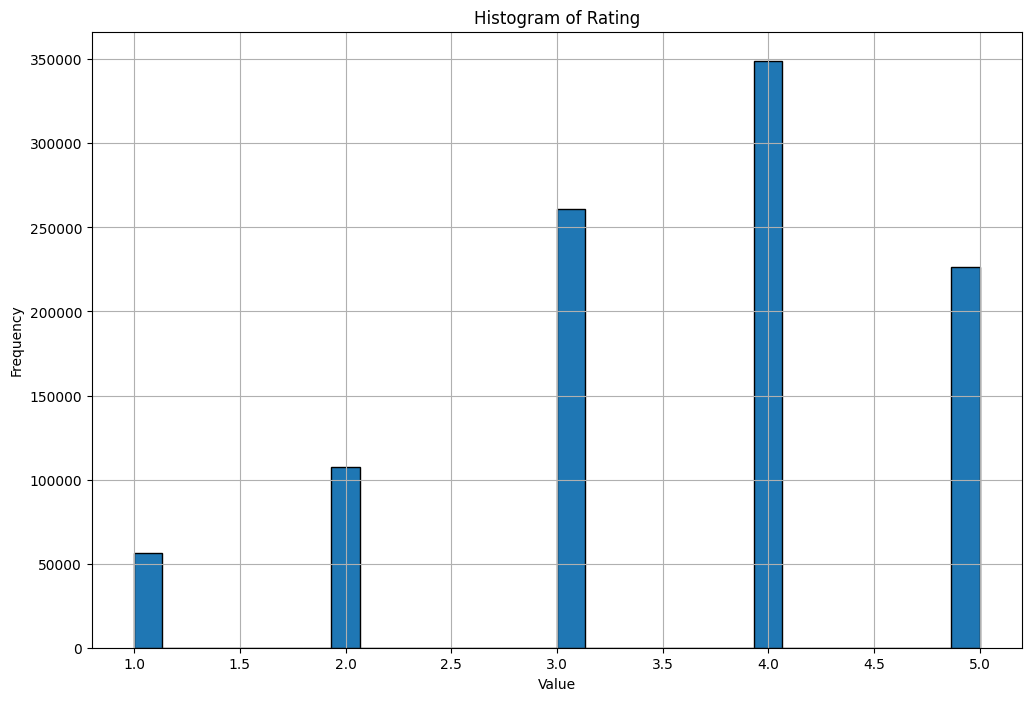

In [680]:
plot_histogram(ratings, 'Rating')

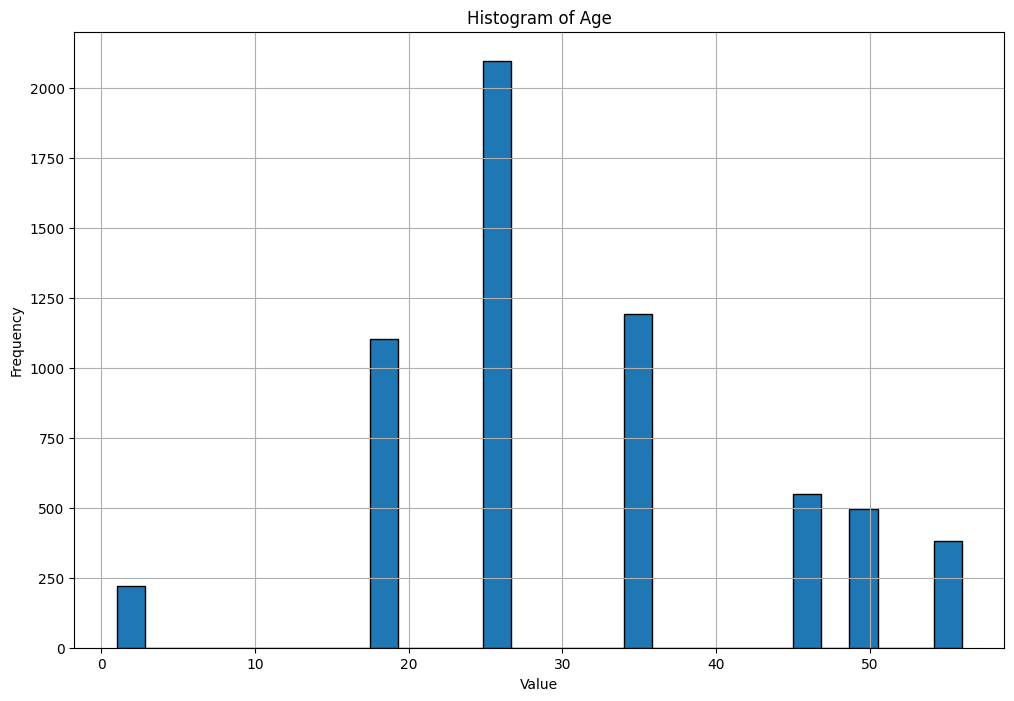

In [681]:
plot_histogram(users, 'Age')

# Merging the Tables:

In [682]:
merge1 = pd.merge(movies, ratings, on= 'MovieID', how= 'inner')
final_df = pd.merge(merge1, users, on= 'UserID', how= 'inner')
final_df

,MovieID,ReleaseYear,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Month,Day,Hour,Minute,Second,Age,Occupation,Zip-code,Gender_F,Gender_M
0,1,1995,0,0,1,1,1,0,0,0,...,1,6,23,37,48,1,10,48067,1,0
1,1,1995,0,0,1,1,1,0,0,0,...,12,31,4,30,8,50,9,55117,1,0
2,1,1995,0,0,1,1,1,0,0,0,...,12,31,3,31,36,25,12,11413,0,1
3,1,1995,0,0,1,1,1,0,0,0,...,12,31,1,25,52,25,17,61614,0,1
4,1,1995,0,0,1,1,1,0,0,0,...,12,31,1,34,34,35,1,95370,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3952,2000,0,0,0,0,0,0,0,1,...,6,9,7,34,59,25,7,92120,1,0
1000205,3952,2000,0,0,0,0,0,0,0,1,...,4,2,14,52,5,25,1,92120,0,1
1000206,3952,2000,0,0,0,0,0,0,0,1,...,1,24,20,4,16,25,7,60607,0,1
1000207,3952,2000,0,0,0,0,0,0,0,1,...,1,18,21,15,37,35,14,10003,0,1


Let's double check that everything in our df is of numeric format.

In [683]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 33 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   MovieID      1000209 non-null  int64
 1   ReleaseYear  1000209 non-null  int32
 2   Action       1000209 non-null  int32
 3   Adventure    1000209 non-null  int32
 4   Animation    1000209 non-null  int32
 5   Children's   1000209 non-null  int32
 6   Comedy       1000209 non-null  int32
 7   Crime        1000209 non-null  int32
 8   Documentary  1000209 non-null  int32
 9   Drama        1000209 non-null  int32
 10  Fantasy      1000209 non-null  int32
 11  Film-Noir    1000209 non-null  int32
 12  Horror       1000209 non-null  int32
 13  Musical      1000209 non-null  int32
 14  Mystery      1000209 non-null  int32
 15  Romance      1000209 non-null  int32
 16  Sci-Fi       1000209 non-null  int32
 17  Thriller     1000209 non-null  int32
 18  War          1000209 non-null  int32
 19  

In [684]:
final_df.apply(lambda x: pd.to_numeric(x, errors='coerce').notnull().all())

MovieID        True
ReleaseYear    True
Action         True
Adventure      True
Animation      True
Children's     True
Comedy         True
Crime          True
Documentary    True
Drama          True
Fantasy        True
Film-Noir      True
Horror         True
Musical        True
Mystery        True
Romance        True
Sci-Fi         True
Thriller       True
War            True
Western        True
UserID         True
Rating         True
Year           True
Month          True
Day            True
Hour           True
Minute         True
Second         True
Age            True
Occupation     True
Zip-code       True
Gender_F       True
Gender_M       True
dtype: bool

In [685]:
# Choosing columns with bigger scales:
cols_to_normalize = [#'MovieID',
                     #'ReleaseYear',
                     #'UserID',
                     'Year',
                     'Month',
                     'Day',
                     'Hour',
                     'Second',
                     'Age',
                     'Occupation',
                     'Zip-code']
# Calculating their z-score:
final_df[cols_to_normalize] = final_df[cols_to_normalize].apply(lambda x: (x - x.mean() / x.std())) 

In [686]:
final_df.head()

,MovieID,ReleaseYear,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Month,Day,Hour,Minute,Second,Age,Occupation,Zip-code,Gender_F,Gender_M
0,1,1995,0,0,1,1,1,0,0,0,...,-2.205324,4.262836,21.490563,37,46.294731,-1.530493,8.769603,48066.899707,1,0
1,1,1995,0,0,1,1,1,0,0,0,...,8.794676,29.262836,2.490563,30,6.294731,47.469507,7.769603,55116.899707,1,0
2,1,1995,0,0,1,1,1,0,0,0,...,8.794676,29.262836,1.490563,31,34.294731,22.469507,10.769603,11412.899707,0,1
3,1,1995,0,0,1,1,1,0,0,0,...,8.794676,29.262836,-0.509437,25,50.294731,22.469507,15.769603,61613.899707,0,1
4,1,1995,0,0,1,1,1,0,0,0,...,8.794676,29.262836,-0.509437,34,32.294731,32.469507,-0.230397,95369.899707,1,0


In [687]:
check_nulls(final_df)

MovieID        0
ReleaseYear    0
Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
UserID         0
Rating         0
Year           0
Month          0
Day            0
Hour           0
Minute         0
Second         0
Age            0
Occupation     0
Zip-code       0
Gender_F       0
Gender_M       0
dtype: int64

# Test-Train Split:

In [688]:
# Defining our X and our y:
X = final_df
X = X.drop('Rating', axis = 1) # Dropping the target value
y = final_df['Rating']

# Splitting our data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42) 

# 1. Collaborative Filtering Approach:
Collaborative filtering is a popular technique for recommendation systems that relies on user-item interactions.

In [689]:
# Creating the User-Item Matrix:
data = final_df[['UserID', 'MovieID', 'Rating']]
user_item_matrix = pd.pivot_table(data= data, 
                            values= 'Rating', 
                            index= 'UserID', 
                            columns = 'MovieID', 
                            # aggfunc= 'mean',
                            )
user_item_matrix

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It is very apperent that we have a sparse matrix. This is to be expected because not every user has rated every movie. In order to deal with this we are going to fill the NaN values with 0. A potential problem wih this is that the algorithm will interpret those zero entries as a user who really disliked that particular movie. In order to combat this we will zero center the data so that the meaning of zero chnages from really disliking to neutral.

In [690]:
# Calculating the average rating across all movies for each user:
avg_user_item_matrix = user_item_matrix.mean(axis= 1) # finds the mean column-wise

# Subtracting the the average ratings from each user:
centered_user_item_matrix = user_item_matrix.sub(avg_user_item_matrix, axis= 0) # subtracts row-wise

# Fill the missing values with zeros:
norm_user_item_matrix = centered_user_item_matrix.fillna(0)
norm_user_item_matrix

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.811321,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.000000,0.0,-1.146465,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.000000,0.0,0.0,-1.302928,0.0,-0.302928,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


How do you determine which users or items are similar to one another?
- Cosine Similarity

In [692]:
# Finding the user-user similarity:
user_similarity_matrix = cosine_similarity(norm_user_item_matrix)
user_similarity_matrix = pd.DataFrame(user_similarity_matrix,
                                    index = norm_user_item_matrix.index, 
                                    columns= norm_user_item_matrix.index)

print(f'User-User Similarity Matrix:')
user_similarity_matrix

User-User Similarity Matrix:


UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.032665,-0.032267,0.016359,-0.016774,0.045229,0.014314,0.013465,0.061905,-0.004469,...,0.012852,0.034246,0.054216,-0.003729,0.069408,-0.038463,0.000283,0.000000,0.011725,0.005210
2,0.032665,1.000000,0.023592,-0.016699,-0.032420,-0.019154,0.062835,-0.002045,0.060978,-0.004654,...,-0.002849,0.012514,0.080611,-0.006570,0.076127,0.088853,0.054506,-0.013096,0.032720,-0.006562
3,-0.032267,0.023592,1.000000,0.042521,-0.031153,-0.010965,0.057895,-0.040328,-0.021620,0.003036,...,-0.016524,0.005764,-0.027753,0.000000,0.009517,0.028658,0.001249,0.046408,0.048975,-0.041902
4,0.016359,-0.016699,0.042521,1.000000,-0.002730,0.032028,-0.031510,0.031002,0.021538,-0.038158,...,-0.038547,0.002558,-0.004579,0.000000,-0.051202,0.043721,0.014981,-0.073011,-0.011580,0.035714
5,-0.016774,-0.032420,-0.031153,-0.002730,1.000000,-0.045909,0.009393,0.045783,0.015280,-0.004929,...,0.019115,0.013596,0.000476,0.011270,0.061089,0.049306,-0.023689,-0.035286,0.017825,0.064367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,-0.038463,0.088853,0.028658,0.043721,0.049306,-0.037376,0.045594,0.068462,0.038704,0.027861,...,0.002771,0.043403,0.069510,0.053376,0.084315,1.000000,0.046758,-0.013619,0.040512,0.112381
6037,0.000283,0.054506,0.001249,0.014981,-0.023689,-0.025158,-0.024350,-0.001524,0.048229,0.001987,...,-0.005739,0.067317,0.022541,0.012091,0.033577,0.046758,1.000000,-0.015227,0.051444,0.070909
6038,0.000000,-0.013096,0.046408,-0.073011,-0.035286,-0.040051,0.000000,0.000440,0.031515,0.069391,...,-0.043571,-0.018585,0.046919,0.000000,0.028166,-0.013619,-0.015227,1.000000,0.043532,-0.039279


In [698]:
# Finding the item-item similarity:
item_similarity_matrix = cosine_similarity(norm_user_item_matrix)
item_similarity_matrix = pd.DataFrame(user_similarity_matrix,
                                    index = norm_user_item_matrix.columns, 
                                    columns= norm_user_item_matrix.columns)

print(f'item-item Similarity Matrix:')
item_similarity_matrix

item-item Similarity Matrix:


MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
MovieID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.032665,-0.032267,0.016359,-0.016774,0.045229,0.014314,0.013465,0.061905,-0.004469,...,0.033919,-0.033573,0.036953,0.064253,0.013544,0.072149,0.022856,0.026390,-0.020033,0.046645
2,0.032665,1.000000,0.023592,-0.016699,-0.032420,-0.019154,0.062835,-0.002045,0.060978,-0.004654,...,0.047588,0.020215,0.099508,0.052350,0.048949,0.013176,0.017151,0.035774,0.038089,0.029060
3,-0.032267,0.023592,1.000000,0.042521,-0.031153,-0.010965,0.057895,-0.040328,-0.021620,0.003036,...,-0.013924,0.018462,-0.020681,0.001611,-0.005254,-0.003723,0.053828,0.018247,0.076771,-0.008617
4,0.016359,-0.016699,0.042521,1.000000,-0.002730,0.032028,-0.031510,0.031002,0.021538,-0.038158,...,0.003170,0.011081,-0.003325,0.026995,0.022589,-0.033054,0.015436,-0.021844,-0.062277,-0.004295
5,-0.016774,-0.032420,-0.031153,-0.002730,1.000000,-0.045909,0.009393,0.045783,0.015280,-0.004929,...,-0.033031,0.004495,0.018117,-0.047372,0.039660,-0.005536,-0.007693,-0.036988,-0.024061,-0.046998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.072149,0.013176,-0.003723,-0.033054,-0.005536,0.016015,-0.001651,0.003603,0.018558,0.016135,...,0.014955,0.017381,0.015072,0.036481,0.000143,1.000000,-0.041595,-0.000383,0.017277,-0.085486
3949,0.022856,0.017151,0.053828,0.015436,-0.007693,0.033639,0.023180,0.011641,-0.002263,0.012079,...,0.000435,0.019194,0.017621,0.006175,0.013377,-0.041595,1.000000,-0.005369,-0.000405,0.030333
3950,0.026390,0.035774,0.018247,-0.021844,-0.036988,-0.092760,0.000000,0.022355,0.030900,-0.030985,...,-0.026123,0.021381,0.016484,-0.038244,-0.027424,-0.000383,-0.005369,1.000000,-0.004229,-0.021085


In [614]:
# Applying PCA to our User-Item Matrix:
pca = PCA(n_components=2) # Number of components

# Fit PCA on scaled data
pca_user_item_matrix = pca.fit_transform(user_item_matrix)

In [615]:
# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.1395681  0.03729351]


In [616]:
# Principal components
print("PCA Results (First 2 Components):\n", pca_result)

PCA Results (First 2 Components):
 [[ -9.26510063   1.10168073]
 [ -0.83168986  -1.81347635]
 [ -8.73366176  -2.24723468]
 ...
 [-14.76231777   1.21443617]
 [ -4.53755253  12.59581246]
 [ 17.25455582  27.39185315]]


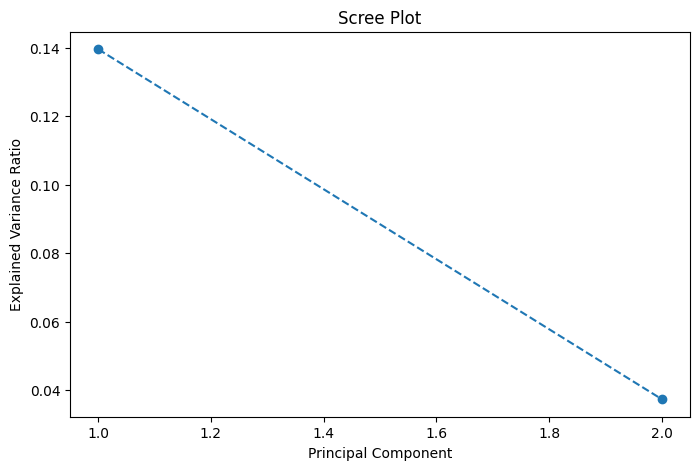

In [617]:
# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

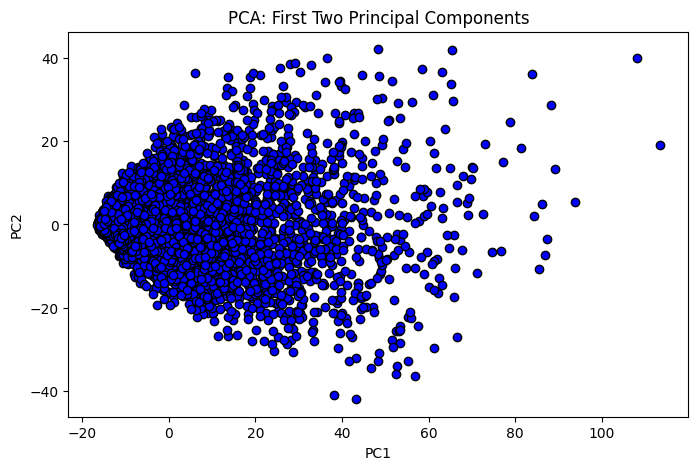

In [618]:
# Scatter plot of first two principal components
plt.figure(figsize=(8, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k')
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [620]:
# Initilaizing KMeans:
kmeans = KMeans(n_clusters= 2, random_state= 42)

# Fitting the model:
kmeans.fit(pca_user_item_matrix)

# Getting the cluster labels:
labeled_user_item_matrix = user_item_matrix.copy() # We'll create a copy because we will still need our original matrix later
labeled_user_item_matrix['Label'] = kmeans.labels_

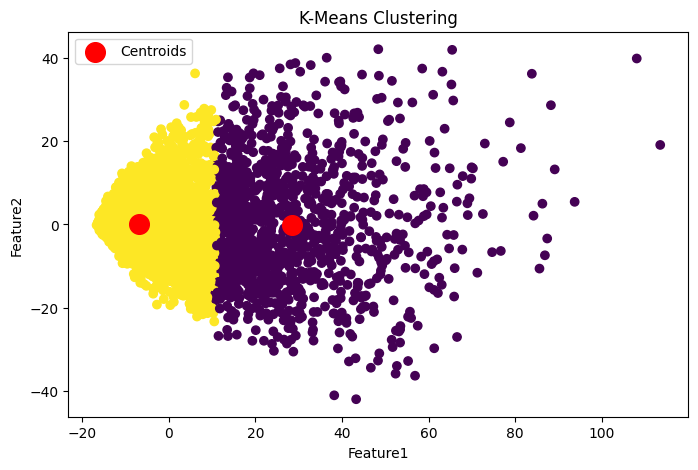

In [622]:
plt.figure(figsize=(8, 5))
plt.scatter(pca_user_item_matrix[:, 0], pca_user_item_matrix[:, 1], c=labeled_user_item_matrix['Label'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

# 2. Content-Based Filtering Approach:

Content-based filtering relies on the features of the items (e.g., genres, title keywords).

# 3. Hybrid Recommendation Systems

Combines collaborative filtering and content-based filtering for better performance.